# this is a script for comparison of 3 SST

In [1]:
%1940-2021 hadley center sst
load('/nexsan/people/fyang/work/Data/sstHad.mat');
lon1=lon;lat1=lat;

In [2]:
% ERA5 SST 1940-2022
load('/nexsan/people/fyang/work/Data/ERA5/sst.mat');
sstERA=sst;
lon2=lon;lat2=lat;

# example of changing annual cycle

In [3]:
aa0=reshape(mean(mean(sstERA(211:221,51:61,:,1:82),1),2),[],1);
tt=15;aa=0*aa0;
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
aa_anomaly=0*aa0;
aa_smooth=0*aa0;
aa_smooth(tt+1:end-tt)=aa(tt+1:end-tt)/(2*tt+1);
aa_anomaly(tt+1:end-tt)=aa0(tt+1:end-tt)-aa(tt+1:end-tt)/(2*tt+1);
aa_anomaly=reshape(aa_anomaly,365,[]);
aa_smooth=reshape(aa_smooth,365,[]);
aa_clim=mean(aa_smooth(:,2:end-1),2);

aa0=reshape(aa_smooth,[],1);
aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
[~,offset]=max(aa2,[],1);
aa2=aa2([1:end,1:end]);
aa2=aa2(offset-182:offset+182);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
aa1=reshape(aa1(61:365*81+60),365,[]);
[~,psmax]=max(aa1,[],1);psmax=psmax'+60;

tmp_smt=aa_smooth(:,[68,70,81]);
tmp_ac=aa_clim;tmp_ac(:,2)=1:size(tmp_ac,1);
tmp_anm1=aa_anomaly+aa_smooth-aa_clim;
tmp_anm1=tmp_anm1(:,[68,70,81]);
tmp_anm2=aa_anomaly;
tmp_anm2=tmp_anm2(:,[68,70,81]);
save('example_phase.mat','tmp_smt','tmp_ac','tmp_anm1','tmp_anm2');

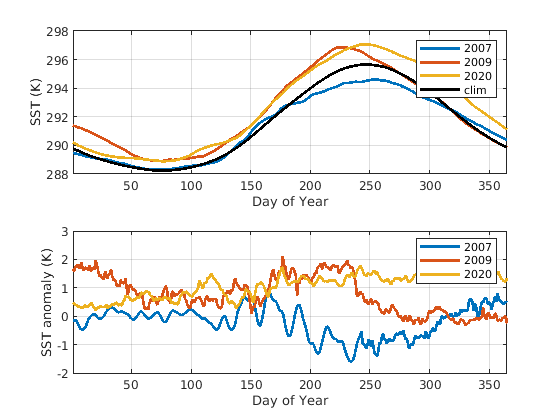

In [4]:
aa=aa_anomaly+aa_smooth-aa_clim;
figure;
subplot(2,1,1);
plot(aa_smooth(:,[68,70,81]),'linewidth',2);
hold on;grid on;
plot(aa_clim,'k','linewidth',2);
legend('2007','2009','2020','clim');
xlim([1,365]);xlabel('Day of Year');
ylabel('SST (K)');
subplot(2,1,2);
plot(aa(:,[68,70,81]),'linewidth',2);
hold on;grid on;
legend('2007','2009','2020');
xlim([1,365]);xlabel('Day of Year');
ylabel('SST anomaly (K)');

# example of running correlation

In [5]:
lx=181;ly=46;
aa0=sstERA(lx-2:lx+2,ly-2:ly+2,:,1:82);
aa0=reshape(mean(mean(aa0,1,'omitnan'),2,'omitnan'),[],1);
tt=15;aa=0*aa0;
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
aa0(tt+1:end-tt)=aa(tt+1:end-tt)/(2*tt+1);
tmp_era=reshape(sstERA(lx,ly,:,1:82),[],1);
tmp_era(:,2)=aa0;

% Max-Min
aa1=reshape(aa0,365,[]);
[~,ps1]=max(aa1(:,2:end-1),[],1);
ps1=ps1';

% Summer
aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
tmp_ac=aa2;
[~,offset]=max(aa2,[],1);
tt=offset-91:offset+91;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
tmp_ac(:,2)=nan;tmp_ac(tt,2)=tmp_ac(tt,1);
tt=offset-182:offset+182;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
aa2=aa2(tt);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
tmp_era(:,3)=aa1;
aa1=reshape(aa1(offset+183:end-2*365+offset+182),365,[]);
[vv,ps2]=max(reshape(aa1,365,[]),[],1);
ps2(vv<.9)=nan;ps2=ps2'+offset+182-365;

aa0=sstERA(lx-2:lx+2,ly-2:ly+2,:,1:82);
aa0=reshape(mean(mean(aa0,1,'omitnan'),2,'omitnan'),[],1);
tt=3;aa=0*aa0;
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
aa0(tt+1:end-tt)=aa(tt+1:end-tt)/(2*tt+1);

% Summer
aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
[~,offset]=max(aa2,[],1);
tt=offset-91:offset+91;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
tt=offset-182:offset+182;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
aa2=aa2(tt);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
aa1=reshape(aa1(offset+183:end-2*365+offset+182),365,[]);
[vv,ps3]=max(reshape(aa1,365,[]),[],1);
ps3(vv<.9)=nan;ps3=ps3'+offset+182-365;

tmp_era(:,4)=1:size(tmp_era,1);
tmp_ac(:,3)=1:size(tmp_ac,1);
ps2(:,2)=ps2+(1:size(ps2,1))'*365;
save('example_rc.mat','tmp_era','tmp_ac','ps1','ps2','ps3');

# phases

In [8]:
mask1=sstHad([111:360,1:41],1:90,:,1:82);

ps_had=nan*zeros(55,7,size(mask1,4),3);
for mlon=1:55
for nlat=1:7

aa0=mask1(5*mlon+6+(-2:2),5*nlat+26+(-2:2),:,:);
if(sum(reshape(isnan(mean(mean(aa0(:,:,:,10:30),3),4)),[],1))>12);
%ps_sst(mlon,nlat,1:63,1:3)=nan;
continue;
end
aa0=reshape(mean(mean(aa0,1,'omitnan'),2,'omitnan'),[],1);
%tt=15;aa=0*aa0;
%for m=1:2*tt+1
%    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
%end
%aa0(tt+1:end-tt)=aa(tt+1:end-tt)/(2*tt+1);

% (1) FT
aa1=reshape(aa0,365,[]);
aa1=aa1(:,2:end-1);
m=1;
aa2=mean((aa1-mean(aa1,1)).*exp(1i*2*pi*m ...
    .*reshape(1:365,[],1)/365),1);
aa2=2*real(aa2.*exp(-1i*2*pi*m.*reshape(1:365,[],1)/365));
[~,imax]=max(aa2,[],1);
ps_had(mlon,nlat,2:end-1,1)=squeeze(imax);

% (2) Summer&Winter
aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
[~,offset]=max(aa2,[],1);
tt=offset-182:offset+182;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
aa2=aa2(tt);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
aa1=reshape(aa1(offset+183:end-2*365+offset+182),365,[]);
[vv,imax]=max(reshape(aa1,365,[]),[],1);
imax(vv<.9)=nan;imax(imax<183-45|imax>183+45)=nan;
ps_had(mlon,nlat,2:end-1,2)=squeeze(imax)+offset-183;

aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
[~,offset]=min(aa2,[],1);
tt=offset-182:offset+182;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
aa2=aa2(tt);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
aa1=reshape(aa1(offset+183:end-2*365+offset+182),365,[]);
[vv,ps]=max(reshape(aa1,365,[]),[],1);
ps(vv<.9)=nan;ps(ps<183-45|ps>183+45)=nan;
ps_had(mlon,nlat,2:end-1,3)=squeeze(ps)+offset-183;

end
end

In [9]:
mask1=sstERA([111:360,1:41],1:90,:,1:82);

ps_era=nan*zeros(55,7,size(mask1,4),3);
for mlon=1:55
for nlat=1:7

aa0=mask1(5*mlon+6+(-2:2),5*nlat+26+(-2:2),:,:);
if(sum(reshape(isnan(mean(mean(aa0(:,:,:,10:30),3),4)),[],1))>12);
%ps_sst(mlon,nlat,1:63,1:3)=nan;
continue;
end
aa0=reshape(mean(mean(aa0,1,'omitnan'),2,'omitnan'),[],1);
tt=15;aa=0*aa0;
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
aa0(tt+1:end-tt)=aa(tt+1:end-tt)/(2*tt+1);

% (1) FT
aa1=reshape(aa0,365,[]);
aa1=aa1(:,2:end-1);
m=1;
aa2=mean((aa1-mean(aa1,1)).*exp(1i*2*pi*m ...
    .*reshape(1:365,[],1)/365),1);
aa2=2*real(aa2.*exp(-1i*2*pi*m.*reshape(1:365,[],1)/365));
[~,imax]=max(aa2,[],1);
ps_era(mlon,nlat,2:end-1,1)=squeeze(imax);

% (2) Summer&Winter
aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
[~,offset]=max(aa2,[],1);
tt=offset-182:offset+182;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
aa2=aa2(tt);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
aa1=reshape(aa1(offset+183:end-2*365+offset+182),365,[]);
[vv,imax]=max(reshape(aa1,365,[]),[],1);
imax(vv<.9)=nan;imax(imax<183-45|imax>183+45)=nan;
ps_era(mlon,nlat,2:end-1,2)=squeeze(imax)+offset-183;

aa2=reshape(aa0,365,[]);
aa2=mean(aa2(:,2:end-1),2);
[~,offset]=min(aa2,[],1);
tt=offset-182:offset+182;tt(tt<.1)=tt(tt<.1)+365;tt(tt>365.1)=tt(tt>365.1)-365;
aa2=aa2(tt);
n=10;
aa2=aa2(1+10*(n-1):365-10*(n-1));aa2=aa2-mean(aa2,1);
tt=(size(aa2,1)-1)/2;aa=0*aa0;bb=0*aa0;cc=0*aa0;
for m=1:2*tt+1
    bb(tt+1:end-tt)=bb(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
bb(tt+1:end-tt)=bb(tt+1:end-tt)/(2*tt+1);
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m))*aa2(m);
    cc(tt+1:end-tt)=cc(tt+1:end-tt)+(aa0(m:end-(2*tt+1-m))-bb(tt+1:end-tt)).^2;
end
aa1=aa./sqrt(cc*sum(aa2.^2,1));
aa1=reshape(aa1(offset+183:end-2*365+offset+182),365,[]);
[vv,ps]=max(reshape(aa1,365,[]),[],1);
ps(vv<.9)=nan;ps(ps<183-45|ps>183+45)=nan;
ps_era(mlon,nlat,2:end-1,3)=squeeze(ps)+offset-183;

end
end

## mean state of phase

In [10]:
% quality control
ps_sst=ps_era;
aa0=ps_sst(:,:,2:81,:);

aa1=aa0-mean(aa0,3,'omitnan');
std_ps=sqrt(mean(aa1.^2,3,'omitnan'));

aa1=aa0;
mn_ps=squeeze(mean(aa1,3,'omitnan'));
aa1=aa1-mean(aa1,3,'omitnan');
std_ps=squeeze(sqrt(mean(aa1.^2,3,'omitnan')));

mask=(squeeze(sum(isnan(aa1),3))>.3*size(aa1,3));
mn_ps(mask)=nan;
mn_ps(:,:,4)=mn_ps(:,:,2)-mn_ps(:,:,3)-183;
std_ps(mask)=nan;
lon=[120:5:390]';lat=[60:-5:30]';

save('mn_ps.mat','mn_ps','std_ps','lon','lat');

## trend of SST phase

In [11]:
% quality control
ps_sst=ps_had;ps_sst(:,:,:,:,2)=ps_era;
ps_sst(:,:,:,3:4,:)=ps_sst(:,:,:,2:3,:);
ps_sst(:,:,:,2,:)=(ps_sst(:,:,:,3,:)+ps_sst(:,:,:,4,:))/2;
aa0=ps_sst(:,:,2:81,:);

aa1=aa0;
aa2=0*aa1+reshape(1:size(aa1,3),1,1,[]);
mn_ps=squeeze(mean(aa1,3,'omitnan'));
aa1=aa1-mean(aa1,3,'omitnan');aa2=aa2-mean(aa2,3,'omitnan');
std_ps=squeeze(sqrt(mean(aa1.^2,3,'omitnan')));
trd_ps=squeeze(mean(aa1.*aa2,3,'omitnan')./mean(aa2.^2,3,'omitnan'));
corr_ps=squeeze(mean(aa1.*aa2,3,'omitnan')./ ...
    sqrt(mean(aa1.^2,3,'omitnan').*mean(aa2.^2,3,'omitnan')));

mask=(squeeze(sum(isnan(aa1),3))>.3*size(aa1,3));
mn_ps(mask)=nan;
std_ps(mask)=nan;
corr_ps(mask)=nan;
trd_ps(mask)=nan;
lon=[120:5:390]';lat=[60:-5:30]';

% significance
test=[];
for m=1:10000
    aa=randn(size(aa0,3),1);
    [rr,pp]=corrcoef(1:size(aa,1),aa);
    test(m,1)=rr(1,2);
    test(m,2)=pp(1,2);
end
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(aa0,4));y=repmat(y,1,1,size(aa0,4));
aa=abs(test(test(:,2)<.05,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(aa0,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(aa0,4));
test05=x;test05(:,:,2)=y;
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(aa0,4));y=repmat(y,1,1,size(aa0,4));
aa=abs(test(test(:,2)<.01,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(aa0,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(aa0,4));
test01=x;test01(:,:,2)=y;

save('trd_ps_2.mat','trd_ps','corr_ps','test05','test01','lon','lat');

## decadal trend

In [11]:
% quality control
ps_sst=ps_had;
aa0=ps_sst(:,:,1:31,2:3);
aa0(:,:,:,:,2)=ps_sst(:,:,11:41,2:3);
aa0(:,:,:,:,3)=ps_sst(:,:,21:51,2:3);
aa0(:,:,:,:,4)=ps_sst(:,:,31:61,2:3);
aa0(:,:,:,:,5)=ps_sst(:,:,41:71,2:3);
aa0(:,:,:,:,6)=ps_sst(:,:,51:81,2:3);

aa1=aa0;
aa2=0*aa1+reshape(1:size(aa1,3),1,1,[]);
mn_ps=squeeze(mean(aa1,3,'omitnan'));
aa1=aa1-mean(aa1,3,'omitnan');aa2=aa2-mean(aa2,3,'omitnan');
std_ps=squeeze(sqrt(mean(aa1.^2,3,'omitnan')));
trd_ps=squeeze(mean(aa1.*aa2,3,'omitnan')./mean(aa2.^2,3,'omitnan'));
corr_ps=squeeze(mean(aa1.*aa2,3,'omitnan')./ ...
    sqrt(mean(aa1.^2,3,'omitnan').*mean(aa2.^2,3,'omitnan')));

mask=(squeeze(sum(isnan(aa1),3))>.3*size(aa1,3));
mn_ps(mask)=nan;
std_ps(mask)=nan;
corr_ps(mask)=nan;
trd_ps(mask)=nan;
lon=[120:5:390]';lat=[60:-5:30]';

% significance
test=[];
for m=1:10000
    aa=randn(size(aa0,3),1);
    [rr,pp]=corrcoef(1:size(aa,1),aa);
    test(m,1)=rr(1,2);
    test(m,2)=pp(1,2);
end
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(aa0,4),size(aa0,5));
y=repmat(y,1,1,size(aa0,4),size(aa0,5));
aa=abs(test(test(:,2)<.05,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test05=x;test05(:,:,:,2)=y;
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(aa0,4),size(aa0,5));
y=repmat(y,1,1,size(aa0,4),size(aa0,5));
aa=abs(test(test(:,2)<.01,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test01=x;test01(:,:,:,2)=y;

save('trd_had_decades.mat','trd_ps','test05','test01','lon','lat');

In [9]:
% quality control
ps_sst=ps_era;
aa0=ps_sst(:,:,1:31,2:3);
aa0(:,:,:,:,2)=ps_sst(:,:,11:41,2:3);
aa0(:,:,:,:,3)=ps_sst(:,:,21:51,2:3);
aa0(:,:,:,:,4)=ps_sst(:,:,31:61,2:3);
aa0(:,:,:,:,5)=ps_sst(:,:,41:71,2:3);
aa0(:,:,:,:,6)=ps_sst(:,:,51:81,2:3);

aa1=aa0;
aa2=0*aa1+reshape(1:size(aa1,3),1,1,[]);
mn_ps=squeeze(mean(aa1,3,'omitnan'));
aa1=aa1-mean(aa1,3,'omitnan');aa2=aa2-mean(aa2,3,'omitnan');
std_ps=squeeze(sqrt(mean(aa1.^2,3,'omitnan')));
trd_ps=squeeze(mean(aa1.*aa2,3,'omitnan')./mean(aa2.^2,3,'omitnan'));
corr_ps=squeeze(mean(aa1.*aa2,3,'omitnan')./ ...
    sqrt(mean(aa1.^2,3,'omitnan').*mean(aa2.^2,3,'omitnan')));

mask=(squeeze(sum(isnan(aa1),3))>.3*size(aa1,3));
mn_ps(mask)=nan;
std_ps(mask)=nan;
corr_ps(mask)=nan;
trd_ps(mask)=nan;
lon=[120:5:390]';lat=[60:-5:30]';

% significance
test=[];
for m=1:10000
    aa=randn(size(aa0,3),1);
    [rr,pp]=corrcoef(1:size(aa,1),aa);
    test(m,1)=rr(1,2);
    test(m,2)=pp(1,2);
end
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(aa0,4),size(aa0,5));
y=repmat(y,1,1,size(aa0,4),size(aa0,5));
aa=abs(test(test(:,2)<.05,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test05=x;test05(:,:,:,2)=y;
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(aa0,4),size(aa0,5));
y=repmat(y,1,1,size(aa0,4),size(aa0,5));
aa=abs(test(test(:,2)<.01,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test01=x;test01(:,:,:,2)=y;

aa1=squeeze(mean(mean(ps_sst(15:23,2:6,1:82,2),1,'omitnan'),2,'omitnan'));
aa1(:,2)=squeeze(mean(mean(ps_sst(35:42,2:6,1:82,3),1,'omitnan'),2,'omitnan'));
aa1(:,3)=1940:2021;
tt=2;aa=0*aa1;
for m=1:2*tt+1
    aa(tt+1:end-tt,:)=aa(tt+1:end-tt,:)+aa1(m:end-(2*tt+1-m),:);
end
aa1(tt+1:end-tt,:,2)=aa(tt+1:end-tt,:)/(2*tt+1);
aa1([1:tt,end-tt+1:end],:,2)=nan;

save('trd_era_decadal.mat','trd_ps','aa1','test05','test01','lon','lat');

## CORR temperature&phase

In [12]:
mask1=sstERA([111:360,1:41],1:90,:,1:82);
tmp_era=nan*zeros(55,7,12,size(mask1,4));
for mlon=1:55
for nlat=1:7

aa0=mask1(5*mlon+6+(-2:2),5*nlat+26+(-2:2),:,:);
if(sum(reshape(isnan(mean(mean(aa0(:,:,:,10:30),3),4)),[],1))>12);
%ps_sst(mlon,nlat,1:63,1:3)=nan;
continue;
end
aa0=reshape(mean(mean(aa0,1,'omitnan'),2,'omitnan'),[],1);
tt=15;aa=0*aa0;
for m=1:2*tt+1
    aa(tt+1:end-tt)=aa(tt+1:end-tt)+aa0(m:end-(2*tt+1-m));
end
aa0(tt+1:end-tt)=aa(tt+1:end-tt)/(2*tt+1);

% monthly mean temperature
month=[31,28,31,30,31,30,31,31,30,31,30,31]';
aa1=aa0;
aa1=reshape(aa1,365,[]);
aa2=zeros(12,size(aa1,2));
for m=1:size(month,1)
    aa2(m,:)=mean(aa1(sum(month(1:m-1))+1:sum(month(1:m)),:),1);
end
tmp_era(mlon,nlat,:,:)=aa2;

end
end

### F

In [14]:
% quality control
ps_sst=ps_era(:,:,:,2:3);
tmp_sst=mean(tmp_era(:,:,6:7,:),3);
tmp_sst(:,:,2,:)=mean(tmp_era(:,:,10:11,:),3);
tmp_sst(:,:,1,2:82,2)=(tmp_era(:,:,1,2:82)+tmp_era(:,:,12,1:81))/2;
tmp_sst(:,:,1,1,2)=nan;
tmp_sst(:,:,2,:,2)=mean(tmp_era(:,:,4:5,:),3);

aa0=ps_sst;
aa0=reshape(aa0,size(aa0,1),size(aa0,2),1,size(aa0,3),size(aa0,4));
aa1=aa0-mean(aa0,4,'omitnan');
std_ps=sqrt(mean(aa1.^2,4,'omitnan'));
aa1=aa0;
aa2=tmp_sst;

aa1=aa1-mean(aa1,4,'omitnan');aa2=aa2-mean(aa2,4,'omitnan');
std_ps=squeeze(sqrt(mean(aa1.^2,4,'omitnan')));
trd_ps=squeeze(mean(aa1.*aa2,4,'omitnan')./ ...
    sqrt(mean(aa1.^2,4,'omitnan').*mean(aa1.^2,4,'omitnan')));
corr_ps=squeeze(mean(aa1.*aa2,4,'omitnan')./ ...
    sqrt(mean(aa1.^2,4,'omitnan').*mean(aa2.^2,4,'omitnan')));

mask=(squeeze(sum(isnan(aa1),4))>.3*size(aa1,4));
std_ps(mask)=nan;
corr_ps(mask)=nan;
lon=[120:5:390]';lat=[60:-5:30]';

% significance
test=[];
for m=1:10000
    aa=randn(size(aa0,4),1);
    [rr,pp]=corrcoef(1:size(aa,1),aa);
    test(m,1)=rr(1,2);
    test(m,2)=pp(1,2);
end
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(corr_ps,3),size(corr_ps,4));
y=repmat(y,1,1,size(corr_ps,3),size(corr_ps,4));
aa=abs(test(test(:,2)<.05,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test05=x;test05(:,:,:,2)=y;
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(corr_ps,3),size(corr_ps,4));
y=repmat(y,1,1,size(corr_ps,3),size(corr_ps,4));
aa=abs(test(test(:,2)<.01,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test01=x;test01(:,:,:,2)=y;

save('reg_anm_ps.mat','trd_ps','test05','test01','lon','lat');

### S

In [15]:
% quality control
ps_sst=ps_era(:,:,:,2:3);
tmp_sst=tmp_era(:,:,5:12,:);
tmp_sst(:,:,3:8,:,2)=tmp_era(:,:,1:6,:);
tmp_sst(:,:,1:2,1,2)=nan;
tmp_sst(:,:,1:2,2:82,2)=tmp_era(:,:,11:12,1:81);

aa0=ps_sst;
aa0=reshape(aa0,size(aa0,1),size(aa0,2),1,size(aa0,3),size(aa0,4));
aa1=aa0-mean(aa0,4,'omitnan');
std_ps=sqrt(mean(aa1.^2,4,'omitnan'));
aa1=aa0;
aa2=tmp_sst;

aa1=aa1-mean(aa1,4,'omitnan');aa2=aa2-mean(aa2,4,'omitnan');
std_ps=squeeze(sqrt(mean(aa1.^2,4,'omitnan')));
corr_ps=squeeze(mean(aa1.*aa2,4,'omitnan')./ ...
    sqrt(mean(aa1.^2,4,'omitnan').*mean(aa2.^2,4,'omitnan')));

mask=(std_ps>50)|(squeeze(sum(isnan(aa1),4))>.3*size(aa1,4));
std_ps(mask)=nan;
corr_ps(mask)=nan;
lon=[120:5:390]';lat=[60:-5:30]';

% significance
test=[];
for m=1:10000
    aa=randn(size(aa0,4),1);
    [rr,pp]=corrcoef(1:size(aa,1),aa);
    test(m,1)=rr(1,2);
    test(m,2)=pp(1,2);
end
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(corr_ps,3),size(corr_ps,4));
y=repmat(y,1,1,size(corr_ps,3),size(corr_ps,4));
aa=abs(test(test(:,2)<.05,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test05=x;test05(:,:,:,2)=y;
[y,x]=meshgrid(lat,lon);
x=repmat(x,1,1,size(corr_ps,3),size(corr_ps,4));
y=repmat(y,1,1,size(corr_ps,3),size(corr_ps,4));
aa=abs(test(test(:,2)<.01,1));aa=min(aa);
x(~(abs(corr_ps)>aa))=nan;x=reshape(x,[],size(x,3),size(x,4));
y(~(abs(corr_ps)>aa))=nan;y=reshape(y,[],size(y,3),size(y,4));
test01=x;test01(:,:,:,2)=y;

save('corr_ps_tmp_2.mat','corr_ps','test05','test01','lon','lat');